In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os

In [2]:
data_path = os.path.join(".", 'BodyM')

train_path = os.path.join(data_path, 'train')
train_data = pd.read_csv(os.path.join(train_path, 'measurements.csv'))
train_hw = pd.read_csv(os.path.join(train_path, 'hwg_metadata.csv'))

test_path = os.path.join(data_path, 'testA')
test_data = pd.read_csv(os.path.join(test_path, 'measurements.csv'))
test_hw = pd.read_csv(os.path.join(test_path, 'hwg_metadata.csv'))

In [3]:
train_data.head()

,subject_id,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist
0,-494U-YoXOD8e8gkCuyaRLn4MLo5P8Dm2B1s59WBGdg,24.343954,52.902378,33.294395,38.709511,102.526024,27.599094,177.610992,108.047134,81.736435,35.915691,67.891273,57.872795,92.286171,16.709131
1,-5OHO2b5mRDY1rvAf07sYYtekEEX7ViEGmvRr7l4tfc,22.001783,46.763233,28.288971,35.649963,99.253395,24.813375,164.379623,92.128685,75.127258,33.848778,60.541386,52.418320,87.307899,15.192038
2,-5iHTazqnmWBsnUY6ymoCw1kORMymRDaUla1eNOjgvI,26.565006,53.288597,30.800959,39.854950,102.391273,27.719795,183.718842,106.044121,84.055527,37.856457,72.004379,52.934086,96.596413,17.936598
3,-60o95b9oEE83BDV3GpsAVPA4TFvxuPPqtXEY5PApy8,24.779566,49.077751,34.613113,38.104267,111.164070,28.550409,169.059113,109.529465,74.310234,38.197800,68.536713,58.656673,103.395119,17.029860
4,-67TrwlJ3GSsqPeHaa2Nb0iQ-BKZfIx4ERysQPZ0-SY,20.788853,42.229557,24.527142,29.181356,93.627777,21.979038,146.516632,87.134102,67.269859,31.659197,52.697277,41.844944,74.400856,15.120061


In [4]:
train_hw.head()

,subject_id,gender,height_cm,weight_kg
0,AhfyGaD1BKo0-u6PeQk2oI-Bw5l0XxpAqNroFuZuy0I,female,160.00,92.4
1,E8tDQ5IgdBwbjLIXu7GwcupEHYbi0eB18YNcsgsSbP8,female,175.75,102.8
2,59bc2767681516389ccf45f9,male,174.80,106.9
3,nRatvgqbYTN77typTgGm4bAurxzpvf5nYg2Mb3gdh8c,male,181.50,111.8
4,fkq68ww6bdyKT16FavI1x_G-u7YZ9SoT1GNMUTSJUek,female,161.60,93.0


In [5]:
# join hw and data
train = pd.merge(train_data, train_hw, on='subject_id')
test = pd.merge(test_data, test_hw, on='subject_id')

# Exploring the data

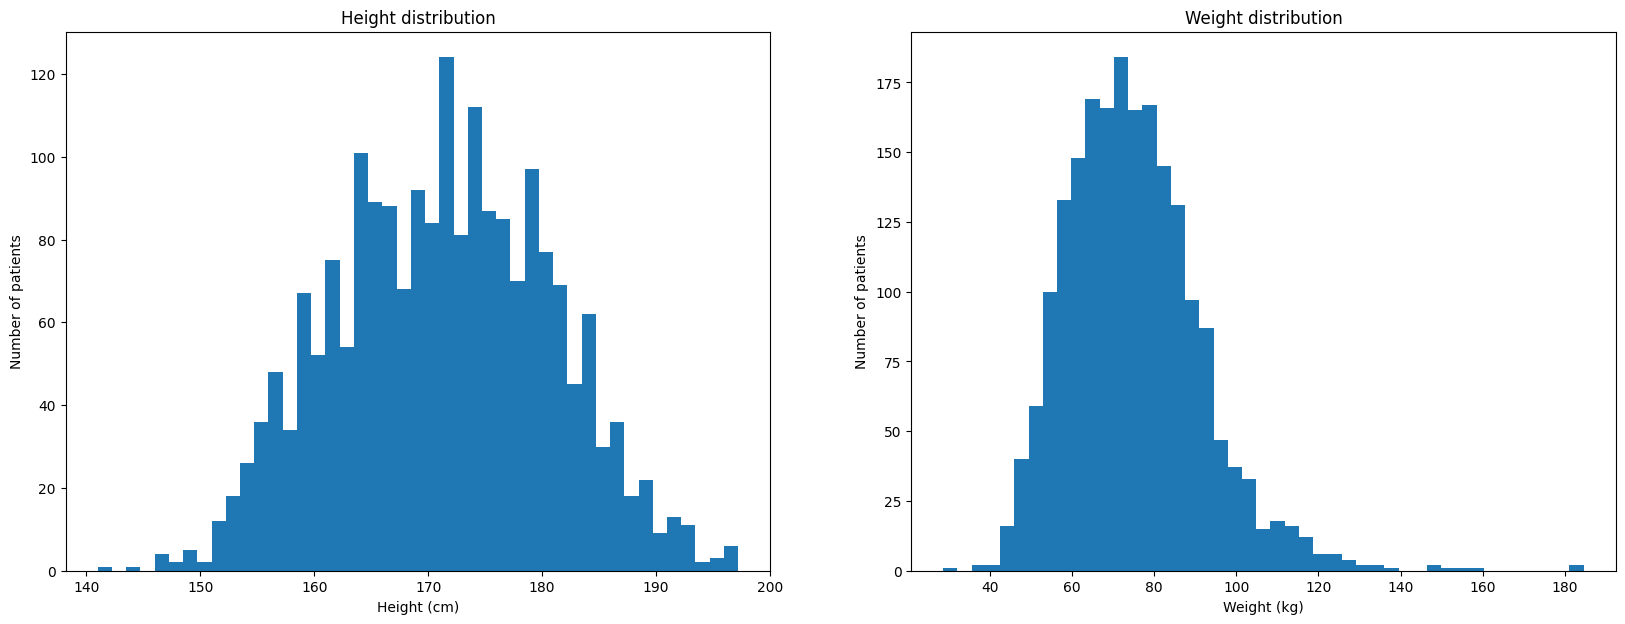

In [6]:
# bin the patients by height
fig, col = plt.subplots(1, 2, figsize=(20, 7))
col[0].hist(train['height_cm'], bins=45)
col[0].set_xlabel('Height (cm)')
col[0].set_ylabel('Number of patients')
col[0].set_title('Height distribution')

# bin the patients by weight
col[1].hist(train['weight_kg'], bins=45)
col[1].set_xlabel('Weight (kg)')
col[1].set_ylabel('Number of patients')
col[1].set_title('Weight distribution')

plt.show()

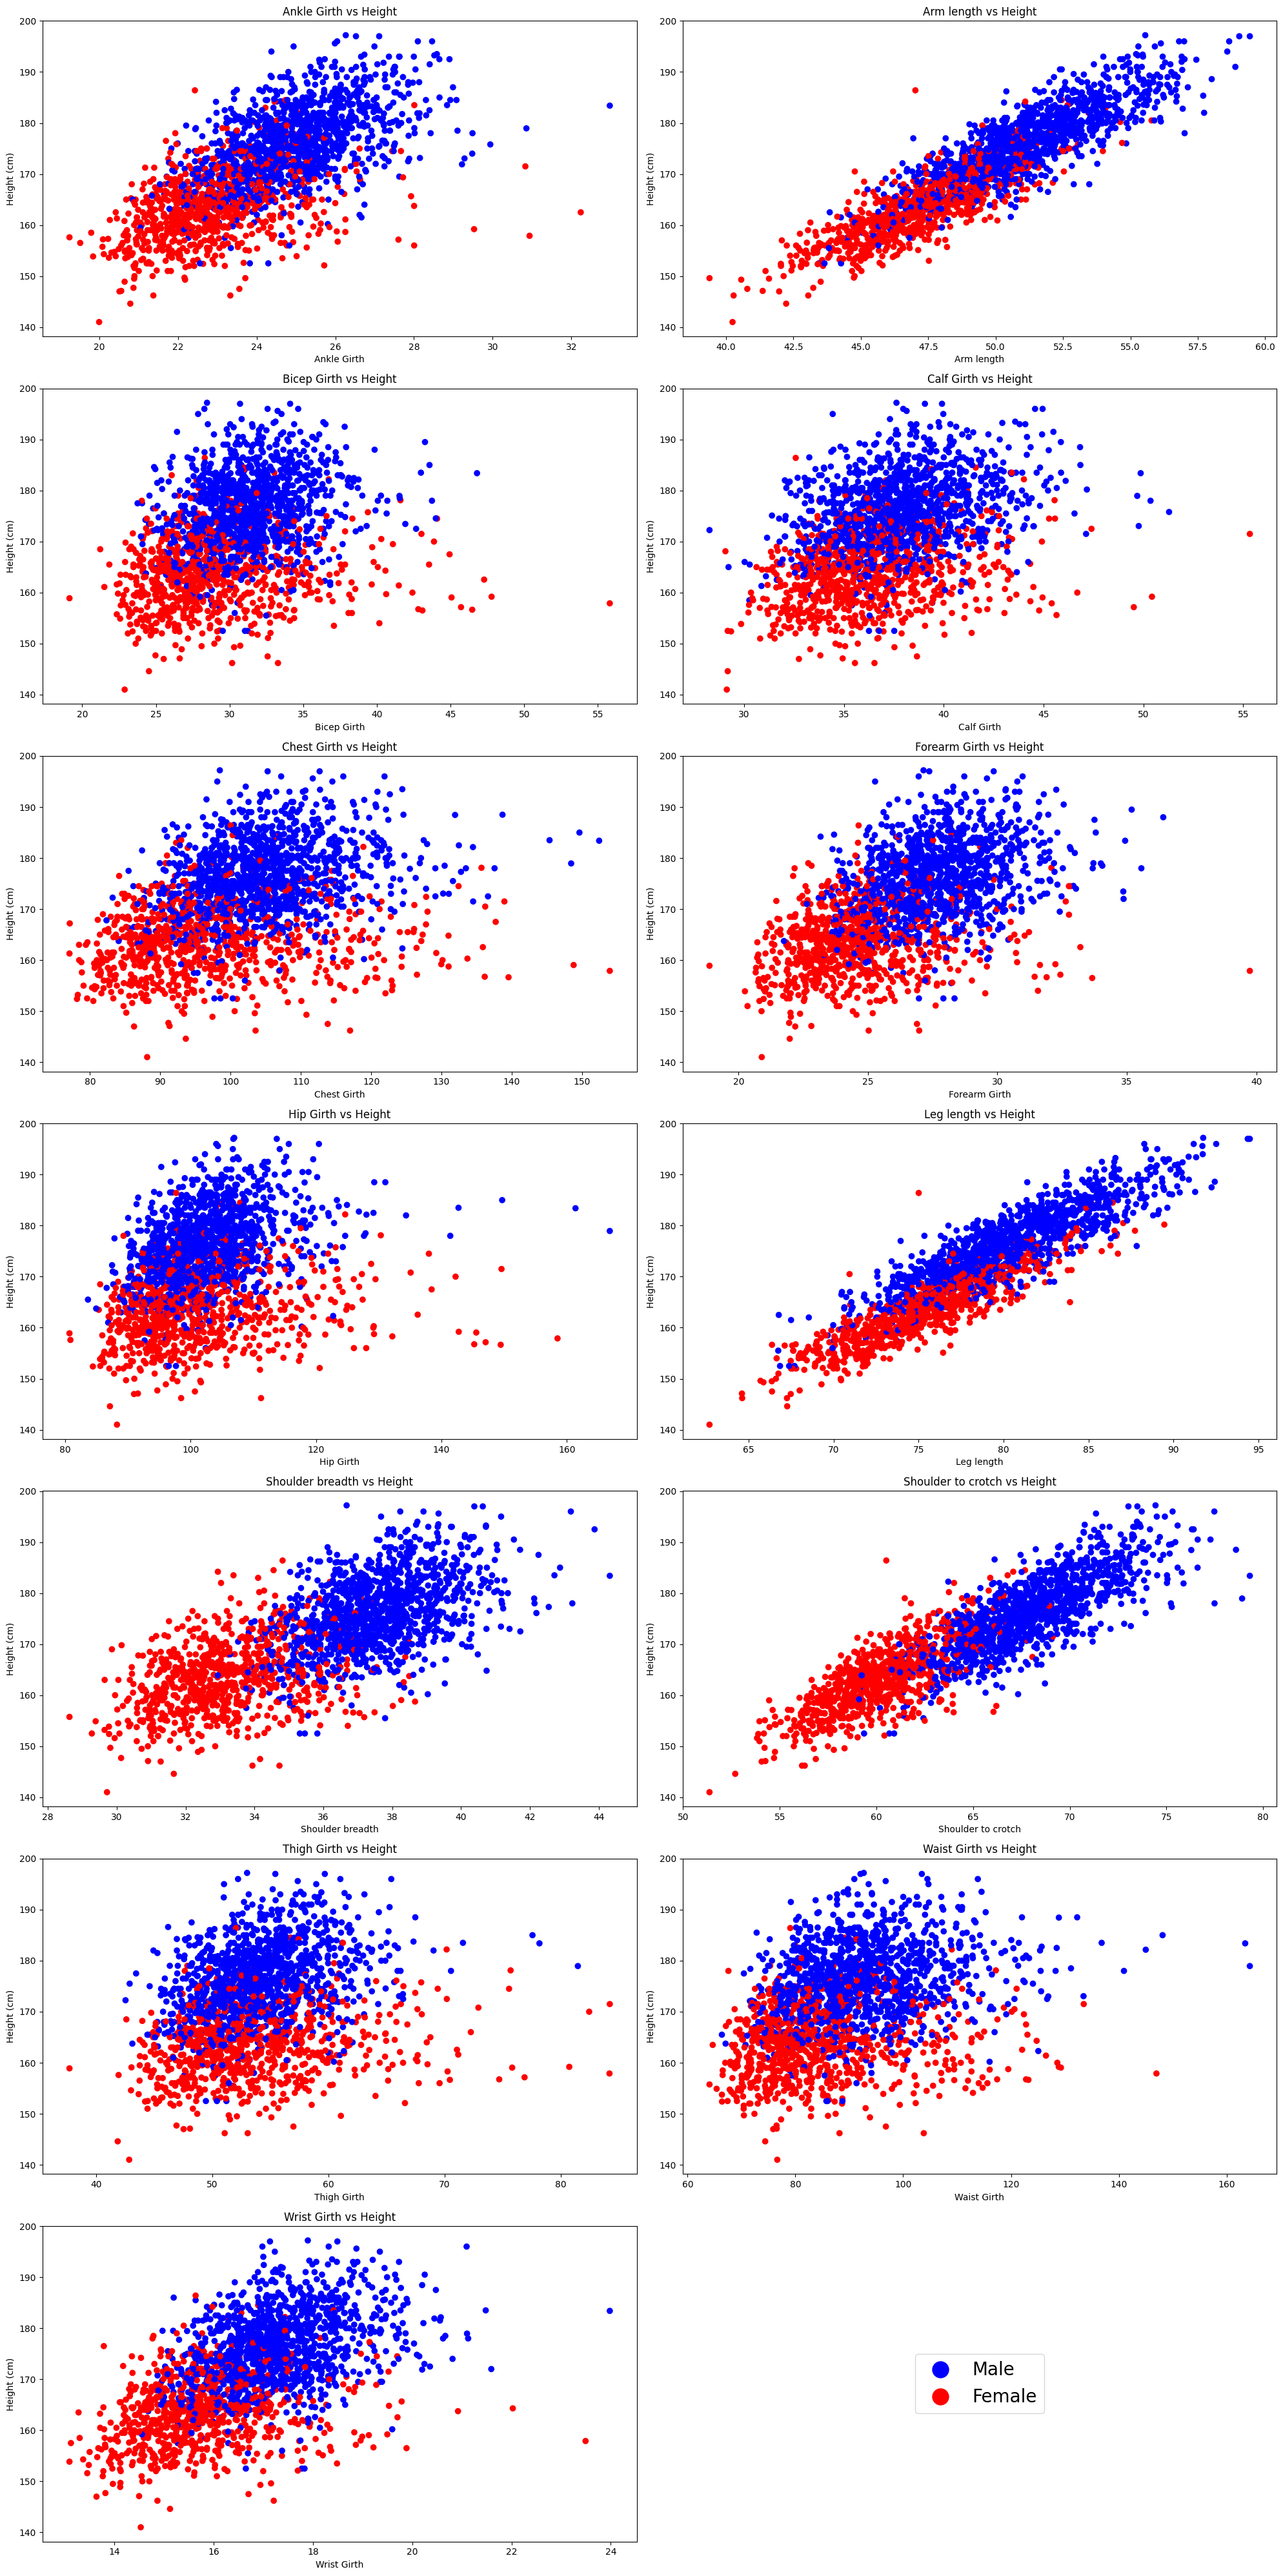

In [7]:
# characteristics vs height
colors = train['gender'].map({'male': 'blue', 'female': 'red'})
fig, col = plt.subplots(7, 2, figsize=(20, 40))

col[0, 0].scatter(train['ankle'], train['height_cm'], c=colors)
col[0, 0].set_xlabel('Ankle Girth')
col[0, 0].set_ylabel('Height (cm)')
col[0, 0].set_title('Ankle Girth vs Height')

col[0, 1].scatter(train['arm-length'], train['height_cm'], c=colors)
col[0, 1].set_xlabel('Arm length')
col[0, 1].set_ylabel('Height (cm)')
col[0, 1].set_title('Arm length vs Height')

col[1, 0].scatter(train['bicep'], train['height_cm'], c=colors)
col[1, 0].set_xlabel('Bicep Girth')
col[1, 0].set_ylabel('Height (cm)')
col[1, 0].set_title('Bicep Girth vs Height')

col[1, 1].scatter(train['calf'], train['height_cm'], c=colors)
col[1, 1].set_xlabel('Calf Girth')
col[1, 1].set_ylabel('Height (cm)')
col[1, 1].set_title('Calf Girth vs Height')

col[2, 0].scatter(train['chest'], train['height_cm'], c=colors)
col[2, 0].set_xlabel('Chest Girth')
col[2, 0].set_ylabel('Height (cm)')
col[2, 0].set_title('Chest Girth vs Height')

col[2, 1].scatter(train['forearm'], train['height_cm'], c=colors)
col[2, 1].set_xlabel('Forearm Girth')
col[2, 1].set_ylabel('Height (cm)')
col[2, 1].set_title('Forearm Girth vs Height')

col[3, 0].scatter(train['hip'], train['height_cm'], c=colors)
col[3, 0].set_xlabel('Hip Girth')
col[3, 0].set_ylabel('Height (cm)')
col[3, 0].set_title('Hip Girth vs Height')

col[3, 1].scatter(train['leg-length'], train['height_cm'], c=colors)
col[3, 1].set_xlabel('Leg length')
col[3, 1].set_ylabel('Height (cm)')
col[3, 1].set_title('Leg length vs Height')

col[4, 0].scatter(train['shoulder-breadth'], train['height_cm'], c=colors)
col[4, 0].set_xlabel('Shoulder breadth')
col[4, 0].set_ylabel('Height (cm)')
col[4, 0].set_title('Shoulder breadth vs Height')

col[4, 1].scatter(train['shoulder-to-crotch'], train['height_cm'], c=colors)
col[4, 1].set_xlabel('Shoulder to crotch')
col[4, 1].set_ylabel('Height (cm)')
col[4, 1].set_title('Shoulder to crotch vs Height')

col[5, 0].scatter(train['thigh'], train['height_cm'], c=colors)
col[5, 0].set_xlabel('Thigh Girth')
col[5, 0].set_ylabel('Height (cm)')
col[5, 0].set_title('Thigh Girth vs Height')

col[5, 1].scatter(train['waist'], train['height_cm'], c=colors)
col[5, 1].set_xlabel('Waist Girth')
col[5, 1].set_ylabel('Height (cm)')
col[5, 1].set_title('Waist Girth vs Height')

col[6, 0].scatter(train['wrist'], train['height_cm'], c=colors)
col[6, 0].set_xlabel('Wrist Girth')
col[6, 0].set_ylabel('Height (cm)')
col[6, 0].set_title('Wrist Girth vs Height')

col[6, 1].axis('off')

# Create custom legend elements
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=20, label='Male'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=20, label='Female')
]

# Add the legend inside col[6, 1]
col[6, 1].legend(handles=legend_elements, loc='center', fontsize=20)

plt.tight_layout()
plt.show()

Given that most characteristics are positively correlated with height, we can use a linear regression model to predict the height of a person. Since arm length, length of the left foot, and shoulder to crotch length have the highest covariance with height, these features will probably play a significant role in the prediction.

Since height seems to be linearly dependent with all the features, we can use a linear regression model to predict the height of a person.

# Prep Data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# get features and transform categorical data to one hot encoding
train_features = pd.get_dummies(train.drop(['subject_id', 'height_cm', 'weight_kg', 'height'], axis=1))
train_linear_features = train_features.copy()
train_linear_features = scaler.fit_transform(train_linear_features)
train_linear_features = np.hstack((train_linear_features, np.ones((train_linear_features.shape[0], 1)))) # add bias term
train_values = train[['height']].to_numpy()

# Models

### Training models

In [9]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def regression(X, y, learning_rate=0.01, epochs=1000, verbose=False):
    num_samples, num_features = X.shape

    # initialize weights and error
    W = np.zeros((num_features, 1))

    error_history = []
    for _ in tqdm(range(epochs), disable=not(verbose)):
        # get the prediction
        prediction = X @ W
        # calculate the error
        current_error = prediction - y
        error_history.append(mse(y, prediction))
        
        # calculate the gradient
        gradient = X.T @ current_error / num_samples
        # update the weights
        W -= learning_rate * gradient

    return W, error_history

In [10]:
height_model_weights, error_history = regression(train_linear_features, train_values)
print(f'Final MSE: {error_history[-1]}')

Final MSE: 1.9558537398643552


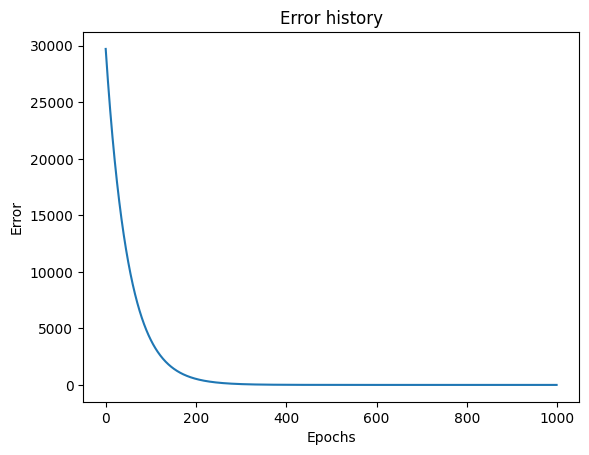

In [11]:
# plot the error history
plt.plot(error_history)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error history')
plt.show()

In [12]:
# sklearn linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train_features, train_values)
sklearn_pred = lr.predict(train_features)
sklearn_error = mean_squared_error(train_values, sklearn_pred)
print(f'Sklearn error: {sklearn_error}')


Sklearn error: 1.3713029308710807


### Test models

In [13]:
# get r-squared
def r_squared(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

In [14]:
test_features = pd.get_dummies(test.drop(['subject_id', 'height_cm', 'weight_kg', 'height'], axis=1))
test_linear_features = test_features.copy()
test_linear_features = scaler.transform(test_linear_features)
test_linear_features = np.hstack((test_linear_features, np.ones((test_linear_features.shape[0], 1)))) # add bias term
test_values = test[['height']].to_numpy()

In [15]:
test_pred = test_linear_features @ height_model_weights
test_error = mse(test_values, test_pred)
print(f'Test error: {test_error}')
print(f'R-squared: {r_squared(test_values, test_pred)}')

Test error: 1.6809976190283888
R-squared: 0.978545213602168


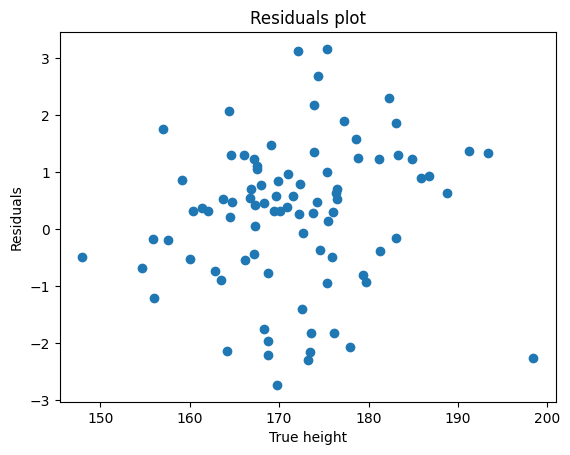

In [16]:
residuals = test_values - test_pred
plt.scatter(test_values, residuals)
plt.xlabel('True height')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.show()

In [17]:
from sklearn import metrics

# sklearn test
sklearn_test_pred = lr.predict(test_features)
sklearn_test_error = mean_squared_error(test_values, sklearn_test_pred)
print(f'Sklearn test error: {sklearn_test_error}')
print(f'Sklearn R-squared: {metrics.r2_score(test_values, sklearn_test_pred)}')

Sklearn test error: 1.1287670332125486
Sklearn R-squared: 0.9855934028006016


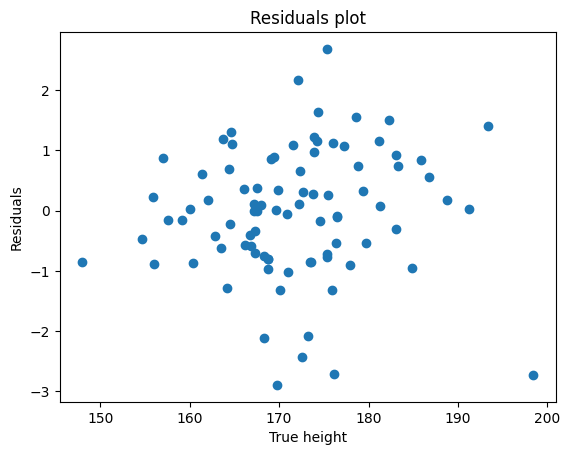

In [18]:
residuals = test_values - sklearn_test_pred
plt.scatter(test_values, residuals)
plt.xlabel('True height')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.show()

# Improving the model

### Polynomial regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_train_data = scaler.fit_transform(train_features)
poly_train_data = poly.fit_transform(poly_train_data)

weights, error_history = regression(poly_train_data, train_values, learning_rate=0.01, epochs=10000)

print(f'Final MSE: {error_history[-1]}')

Final MSE: 1.4798017211758412


In [20]:
# sklearn polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_train_data = poly.fit_transform(train_features)
pol_lr = LinearRegression()
pol_lr.fit(poly_train_data, train_values)
sklearn_pred = pol_lr.predict(poly_train_data)
sklearn_error = mean_squared_error(train_values, sklearn_pred)
print(f'Sklearn error: {sklearn_error}')

Sklearn error: 1.24485187898054


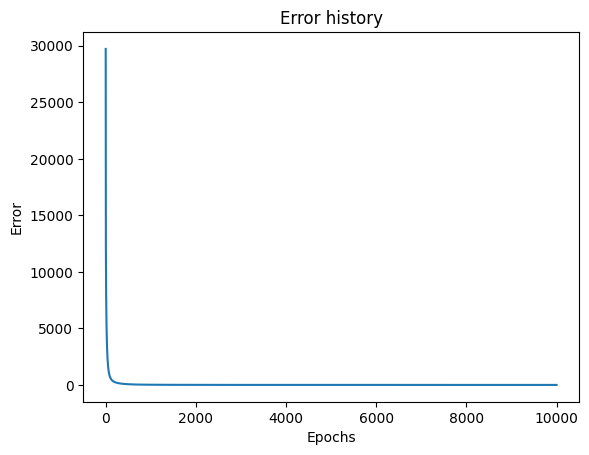

In [21]:
# plot the error history
plt.plot(error_history)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error history')
plt.show()